# Introduction

The point of this `python` `notebook` is to create a minimum example of thing we may want to obtain while converting a notebook into a pdf. Here we should be able to:

* Use the notebook metadata to edit the pdf:
    * `"author":"[...]"`,`"title":"[...]"`(`"subtitle":"[...]"`), `"affiliation":"[...]"`
    * `"abstract":"[...]"`, `"keywords":"[...]"`
    * `"bibfile":"[...]"`, `"bibstyle":"[...]"`
* Show or hide cells within the pdf
    * `"hide": true` in the cell metadata should make the source not appear
    * `"show": true` should make cell that would be hidden by default appear
* figures and table
    * `"width":"[...]"` and `"width":"[...]"` limit the size of figures and tables. 
    * Use `"caption": "[...]"` to add a legend to a table or a figure
    * Use `"label": "[...]"`  to set a label fr referencing
* Citations should be handled correctly in the pdf
    * For the citation to appear in this notebook 
        1. use the `LaTeX_env` `nbextension`, and 
        1. copy the bibtex you need into `biblio.bib`
        1. and click on the book 'Read bibliography and generate reference section
        1. use "hide": true in the Reference cell metadata so that it doesn't appear "twice" in the pdf
        
Since this block is not that relevant to the pdf, **it won't be displayed in the pdfs**

In [1]:
# this code should not appear in pdf 
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from IPython.display import set_matplotlib_formats
from sklearn import datasets
from sklearn import svm
from collections import Counter
from matplotlib.colors import LinearSegmentedColormap

In [2]:
# this code should not appear in pdf
%matplotlib inline
set_matplotlib_formats('png', 'pdf')
pd.set_option('display.notebook_repr_html', True)
pd.set_option('precision', 3)
def _repr_latex_(self):
    return "%s" % self.to_latex()
pd.DataFrame._repr_latex_ = _repr_latex_  

# Data

The iris dataset is common test example for machine learning and can be found in the `datasets` packages of `R` or as in this instance the `sklearn` package in `python`. This data set was first published in  \cite{Fisher1936}, in was further use for the purpose of testing machine learning classification algorithm such as in \cite{RoHart1973}, \cite{Dasarathy1980}. 

In [3]:
# This code should appear in the codedoc not in the article
# load the iris data set
iris = datasets.load_iris()
# print(iris['DESCR']) # uncomment to test a stream output

1. Number of Instances: 150 (50 in each of three classes)
1. Number of Attributes: 4 numeric, predictive attributes and the class
    * sepal length in cm
    * sepal width in cm
    * petal length in cm
    * petal width in cm
1. class:
    * Iris-Setosa
    * Iris-Versicolour
    * Iris-Virginica

In [4]:
# This code should appear in the codedoc not in the article
# Copy data as a pandas data frame
pd_iris = pd.DataFrame(iris.data,columns=\
    ['sepal length','sepal width','petal length','petal width'])
# Add the target class in the data frame
target = iris.target
# Copy the targetnames
target_names = iris.target_names

## Data frames

The 3 class are indicated in the data as integers 0, 1 and 2:

In [5]:
# This should appear everywhere
Counter(target)

Counter({0: 50, 1: 50, 2: 50})

With the corresponding class names:

In [6]:
# This should appear everywhere
list(target_names)

['setosa', 'versicolor', 'virginica']

We explore the first few element of the iris data set for each class:

* setosa encoded as 0 (see Table \ref{tab:hseto}), 
* versicolor encoded as 1 (see Table \ref{tab:hvers}) 
* virginica encoded as 2 (see Table \ref{tab:hvirg}). 

We note that the row are ordered by class. This is not important here, since we try to test reference to some tables but for machine learning tasks it is advised to shuffle the row both in the data and the target. 

In [7]:
# This code should appear in the codedoc not in the article
# print the data frame as a table
pd_iris[target==0].head(n=10)

,sepal length,sepal width,petal length,petal width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
5,5.4,3.9,1.7,0.4
6,4.6,3.4,1.4,0.3
7,5.0,3.4,1.5,0.2
8,4.4,2.9,1.4,0.2
9,4.9,3.1,1.5,0.1


In [8]:
# this code should not appear in pdf
pd_iris[target==1].head(n=10)

,sepal length,sepal width,petal length,petal width
50,7.0,3.2,4.7,1.4
51,6.4,3.2,4.5,1.5
52,6.9,3.1,4.9,1.5
53,5.5,2.3,4.0,1.3
54,6.5,2.8,4.6,1.5
55,5.7,2.8,4.5,1.3
56,6.3,3.3,4.7,1.6
57,4.9,2.4,3.3,1.0
58,6.6,2.9,4.6,1.3
59,5.2,2.7,3.9,1.4


In [9]:
# this code should not appear in pdf
pd_iris[target==2].head(n=10)

,sepal length,sepal width,petal length,petal width
100,6.3,3.3,6.0,2.5
101,5.8,2.7,5.1,1.9
102,7.1,3.0,5.9,2.1
103,6.3,2.9,5.6,1.8
104,6.5,3.0,5.8,2.2
105,7.6,3.0,6.6,2.1
106,4.9,2.5,4.5,1.7
107,7.3,2.9,6.3,1.8
108,6.7,2.5,5.8,1.8
109,7.2,3.6,6.1,2.5


This text is a Lorem Ipsum, it should not appear in the documentation template, and should add a lorem ipsum in the chapter and article template. It should also appear in the beamer, to test the animation on the table above.

## Visualization

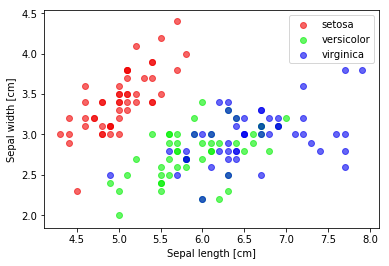

In [10]:
# This code should appear in the codedoc not in the article
colors = ["#f00000","#00f000","#0000f0"]
for col, i, target_name in zip(colors, [0, 1, 2], target_names):
    byclass = target==i
    plt.scatter(pd_iris['sepal length'][byclass],
                pd_iris['sepal width'][byclass],
                c=col, alpha=0.6,label=target_name)
    plt.xlabel('Sepal length [cm]')
    plt.ylabel('Sepal width [cm]')
plt.legend(scatterpoints=1)
plt.show()

This text is once again a Lorem Ipsum, it should appear **only in the article and chapter template**.

# Model

For fun were testing different classification models for the iris dataset using the Support Vector Classification (SVC) method.
This exemple is taken from the`sklearn` documantation. We test the SVC methods with:

* a linear kernel (see Figure \ref{fig:svm_lin})
* a Radial Basis Function kernel (RBF, see Figure \ref{fig:svm_rbf})
* a degree 3 polynomial kernel (see Figure \ref{fig:svm_poly})

In [11]:
# This code should appear in the codedoc not in the article
# Select columns
colsel = np.logical_or(pd_iris.columns.values == "sepal width",
                       pd_iris.columns.values =="sepal length")
X      = np.array(pd_iris)[:,colsel]
# Run SVM
C        = 1.0  # SVM regularization parameter
lin_svc  = svm.LinearSVC(C=C).fit(X, target)
rbf_svc  = svm.SVC(kernel='rbf', gamma=0.7, C=C).fit(X, target)
poly_svc = svm.SVC(kernel='poly', degree=3, C=C).fit(X, target)
# create a mesh to plot in
h = .02  # step size in the mesh
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

In [12]:
# This code should appear in the codedoc not in the article
colors = ["#f00000","#00f000","#0000f0"]
tcm = LinearSegmentedColormap.from_list("iris target", colors, N=3)
def plot_svmtest(clf):
    
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=tcm, alpha=0.2)
    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=target, cmap=tcm, alpha=0.5)
    plt.xlabel('Sepal length')
    plt.ylabel('Sepal width')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.show()

## Linear kernel SVC

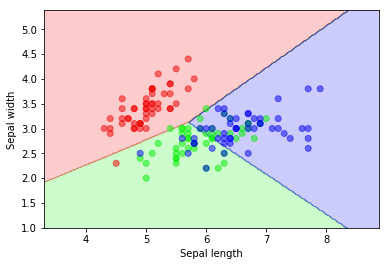

In [13]:
# this code should not appear in pdf
plot_svmtest(lin_svc)

This text is a Lorem Ipsum, it should not appear in the documentation template, and should add a lorem ipsum in the chapter and article template. It should also appear in the beamer, to test the animation on the table above.

## Radial basis function kernel SVC

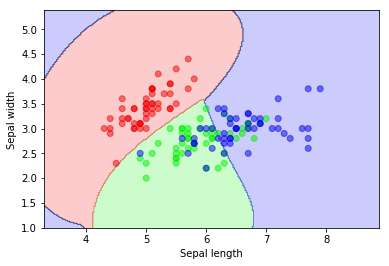

In [14]:
# this code should not appear in pdf
plot_svmtest(rbf_svc)

This text is once again a Lorem Ipsum, it should appear **only in the article and chapter template**.

## Polynomial kernel SVC

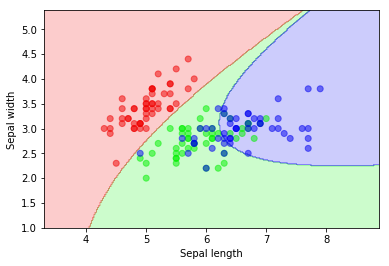

In [15]:
# this code should not appear in pdf
plot_svmtest(poly_svc)

This text is a Lorem Ipsum, it should appear **only in the article and chapter template**.

# References

[<a id="cit-Fisher1936" href="#call-Fisher1936">Fisher1936</a>] Fisher R. A., ``_The use of multiple measurements in taxonomic problems_'', Annals of Eugenics, vol. 7, number 2, pp. 179--188,  1936.  [online](http://dx.doi.org/10.1111/j.1469-1809.1936.tb02137.x)

[<a id="cit-RoHart1973" href="#call-RoHart1973">RoHart1973</a>] Duda Ro and Hart Pe, ``_Pattern Classification and Scene Analysis_'',  1973.

[<a id="cit-Dasarathy1980" href="#call-Dasarathy1980">Dasarathy1980</a>] Dasarathy B. V., ``_Nosing Around the Neighborhood: A New System Structure and Classification Rule for Recognition in Partially Exposed Environments_'', IEEE Transactions on Pattern Analysis and Machine Intelligence, vol. PAMI-2, number 1, pp. 67-71, Jan 1980.

